<a href="https://colab.research.google.com/github/ricecakeblack/myRepoTest/blob/main/1_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%83%9C%EC%96%91%EA%B4%91%EB%B0%9C%EC%A0%84%EC%86%8C%EC%9C%84%EC%B9%98_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment',  None)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 공공데이터포털에서 제주특별자치도_태양광발전소현황 파일 다운로드
# https://www.data.go.kr/data/3082724/fileData.do
csvPath ='//content/drive/MyDrive/구글클라우드/수업(코드)/Pandas/ds/제주/제주특별자치도_태양광발전소현황_20220630.csv'

df = pd.read_csv(csvPath, encoding='cp949')
df

,행정시,읍면동,허가일자,상호,설비용량(KW),상태,사업개시일,데이터기준일자
0,제주시,구좌읍,1998-06-10,행원풍력발전단지(1차),3480.0,사업개시,2000-04-05,2022-06-30
1,제주시,회천동,2002-12-09,파낙스에너지(주),1000.0,사업개시,2002-12-18,2022-06-30
2,제주시,한경면,2003-04-14,한경풍력 1단계,6000.0,사업개시,2004-02-28,2022-06-30
3,제주시,한경면,2005-04-04,신창풍력발전단지,1700.0,사업개시,2006-03-03,2022-06-30
4,제주시,구좌읍,2005-08-30,제주월정풍력발전소,1500.0,사업개시,2006-07-20,2022-06-30
...,...,...,...,...,...,...,...,...
2143,제주시,한경면,2022-06-08,민재 태양광발전소,99.6,인허가,NaN,2022-06-30
2144,제주시,한림읍,2022-06-08,효일4호 태양광발전소,99.0,인허가,NaN,2022-06-30
2145,제주시,한림읍,2022-06-08,효일3호 태양광발전소,99.0,인허가,NaN,2022-06-30
2146,제주시,한림읍,2022-06-08,효일5호 태양광발전소,99.0,인허가,NaN,2022-06-30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정시       2148 non-null   object 
 1   읍면동       2148 non-null   object 
 2   허가일자      2148 non-null   object 
 3   상호        2148 non-null   object 
 4   설비용량(KW)  2148 non-null   float64
 5   상태        2148 non-null   object 
 6   사업개시일     1571 non-null   object 
 7   데이터기준일자   2148 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.4+ KB


In [13]:
# 사업개시일이 있는 데이터만 골라낸다.
# 사업개시일이 없는 데이터는 아직 인허가가 진행중인 것이므로 drop
df = df.dropna(axis=0)
df

,행정시,읍면동,허가일자,상호,설비용량(KW),상태,사업개시일,데이터기준일자
0,제주시,구좌읍,1998-06-10,행원풍력발전단지(1차),3480.00,사업개시,2000-04-05,2022-06-30
1,제주시,회천동,2002-12-09,파낙스에너지(주),1000.00,사업개시,2002-12-18,2022-06-30
2,제주시,한경면,2003-04-14,한경풍력 1단계,6000.00,사업개시,2004-02-28,2022-06-30
3,제주시,한경면,2005-04-04,신창풍력발전단지,1700.00,사업개시,2006-03-03,2022-06-30
4,제주시,구좌읍,2005-08-30,제주월정풍력발전소,1500.00,사업개시,2006-07-20,2022-06-30
...,...,...,...,...,...,...,...,...
2050,서귀포시,안덕면,2021-04-19,썬 태양광발전소,182.00,사업개시,2022-01-03,2022-06-30
2051,서귀포시,안덕면,2021-04-19,청춘 태양광발전소,662.48,사업개시,2022-01-03,2022-06-30
2055,서귀포시,표선면,2021-04-21,제주덕암 태양광발전소,99.18,사업개시,2022-01-03,2022-06-30
2083,서귀포시,안덕면,2021-08-03,태양7호태양광발전소,198.88,사업개시,2021-12-10,2022-06-30


In [14]:
# 사업개시일이 기록되었는데 상태가 '공사진행','인허가'인 경우
df[df['상태']!='사업개시']

,행정시,읍면동,허가일자,상호,설비용량(KW),상태,사업개시일,데이터기준일자
6,제주시,한경면,2006-08-11,탐라해상풍력발전소,30000.0,공사진행,2017-09-16,2022-06-30
29,서귀포시,성산읍,2008-02-28,성산풍력 1단계,12000.0,공사진행,2009-03-30,2022-06-30
583,제주시,한경면,2016-11-16,성용유화발전,750.0,인허가,2016-11-16,2022-06-30


아래 홈페이지를 보면 '탐라해상풍력발전소'는 17년 9월에 건설을 마치고 사업을 시작한 것으로 보인다. <br>
http://tamra-owp.co.kr/2019/sub0201.php

성산풍력 1단계도 준공기사를 확인할 수 있다.
https://jejunews.com/news/articleView.html?idxno=279219

따라서 상태를 '사업개시'로 수정하자.

In [15]:
del df['허가일자']

In [16]:
df.loc[6, '상태'] = '사업개시'
df.loc[6]

행정시                제주시
읍면동                한경면
상호           탐라해상풍력발전소
설비용량(KW)       30000.0
상태                사업개시
사업개시일       2017-09-16
데이터기준일자     2022-06-30
Name: 6, dtype: object

In [17]:
df.loc[29, '상태'] = '사업개시'
df.loc[29]

행정시               서귀포시
읍면동                성산읍
상호            성산풍력 1단계
설비용량(KW)       12000.0
상태                사업개시
사업개시일       2009-03-30
데이터기준일자     2022-06-30
Name: 29, dtype: object

In [18]:
df.loc[583, '상태'] = '사업개시'
df.loc[583]

행정시                제주시
읍면동                한경면
상호              성용유화발전
설비용량(KW)         750.0
상태                사업개시
사업개시일       2016-11-16
데이터기준일자     2022-06-30
Name: 583, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 2091
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정시       1571 non-null   object 
 1   읍면동       1571 non-null   object 
 2   상호        1571 non-null   object 
 3   설비용량(KW)  1571 non-null   float64
 4   상태        1571 non-null   object 
 5   사업개시일     1571 non-null   object 
 6   데이터기준일자   1571 non-null   object 
dtypes: float64(1), object(6)
memory usage: 130.5+ KB


In [20]:
df['사업개시일'] = pd.to_datetime(df['사업개시일'])

In [21]:
df.sort_values(by='사업개시일', inplace=True)

In [22]:
# 데이터프레임의 인덱스를 새롭게 생성한다.
df.reset_index(drop=True, inplace=True)

In [23]:
df

,행정시,읍면동,상호,설비용량(KW),상태,사업개시일,데이터기준일자
0,제주시,구좌읍,행원풍력발전단지(1차),3480.00,사업개시,2000-04-05,2022-06-30
1,제주시,회천동,파낙스에너지(주),1000.00,사업개시,2002-12-18,2022-06-30
2,제주시,한경면,한경풍력 1단계,6000.00,사업개시,2004-02-28,2022-06-30
3,제주시,한경면,신창풍력발전단지,1700.00,사업개시,2006-03-03,2022-06-30
4,제주시,한경면,오복산전,59.87,사업개시,2006-07-11,2022-06-30
...,...,...,...,...,...,...,...
1566,서귀포시,남원읍,다연쏠라,999.60,사업개시,2022-05-31,2022-06-30
1567,제주시,한경면,태광발전소,99.60,사업개시,2022-06-02,2022-06-30
1568,제주시,한경면,맑음에너지,99.60,사업개시,2022-06-02,2022-06-30
1569,제주시,한경면,더썬에너지,99.60,사업개시,2022-06-02,2022-06-30


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   행정시       1571 non-null   object        
 1   읍면동       1571 non-null   object        
 2   상호        1571 non-null   object        
 3   설비용량(KW)  1571 non-null   float64       
 4   상태        1571 non-null   object        
 5   사업개시일     1571 non-null   datetime64[ns]
 6   데이터기준일자   1571 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 86.0+ KB


In [25]:
wind_index = df[df['상호'].str.contains('풍력')].index
wind_index

Int64Index([   0,    2,    3,    5,   11,   25,   35,   42,   45,   47,   55,
              64,   69,   82,   98,  137,  227,  241,  248,  291,  317,  371,
             448,  464,  990, 1027],
           dtype='int64')

In [26]:
for i in wind_index.to_list():
    df.loc[i, '유형'] = '풍력'

In [ ]:
solar_index1 = df[df['상호'].str.contains('태양')].index
solar_index2 = df[df['상호'].str.contains('솔라')].index
solar_index3 = df[df['상호'].str.contains('햇빛')].index

solar_index = solar_index1.to_list() + solar_index2.to_list() + solar_index3.to_list()

for i in solar_index:
    df.loc[i, '유형'] = '태양광'

In [ ]:
df

,행정시,읍면동,상호,설비용량(KW),상태,사업개시일,데이터기준일자,유형
0,제주시,구좌읍,행원풍력발전단지(1차),3480.00,사업개시,2000-04-05,2022-06-30,풍력
1,제주시,회천동,파낙스에너지(주),1000.00,사업개시,2002-12-18,2022-06-30,NaN
2,제주시,한경면,한경풍력 1단계,6000.00,사업개시,2004-02-28,2022-06-30,풍력
3,제주시,한경면,신창풍력발전단지,1700.00,사업개시,2006-03-03,2022-06-30,풍력
4,제주시,한경면,오복산전,59.87,사업개시,2006-07-11,2022-06-30,NaN
...,...,...,...,...,...,...,...,...
1566,서귀포시,남원읍,다연쏠라,999.60,사업개시,2022-05-31,2022-06-30,NaN
1567,제주시,한경면,태광발전소,99.60,사업개시,2022-06-02,2022-06-30,NaN
1568,제주시,한경면,맑음에너지,99.60,사업개시,2022-06-02,2022-06-30,NaN
1569,제주시,한경면,더썬에너지,99.60,사업개시,2022-06-02,2022-06-30,NaN


### 이제 나머지 부분은 상호만으로는 신재생 에너지의 유형을 확인하기 어렵다.
### 추가 파일을 통해 데이터를 추가하고 이를 활용하자.

In [6]:
csvPath='/content/drive/MyDrive/구글클라우드/수업(코드)/Pandas/ds/제주/제주특별자치도_신재생에너지발전시설현황_20200120.csv'

df2 = pd.read_csv(csvPath, encoding='cp949')
df2

,허가일자,상호,설비용량(KW),설치행정시,설치지역,원동력종류,사업개시일,구분,데이터기준일자
0,2018.4.4,(유)나월(나월태양광발전소),496.80,제주시,애월읍,태양광,2019.4.26,육상,2020.1.20
1,2014.10.7,(유)메가솔라 태양광발전소,1800.00,제주시,구좌읍,태양광,2015.7.1,없음,2020.1.20
2,2014.5.15,(유)무한에코에너지(서민행복8호태양광발전소),516.00,서귀포시,남원읍,태양광,2014.10.16,없음,2020.1.20
3,2014.12.9,(유)용흥마을태양광발전소,99.00,서귀포시,강정동,태양광,2015.10.29,없음,2020.1.20
4,2014.10.14,(유)제주 늘해랑,2198.00,서귀포시,성산읍,태양광,2019.1.31,없음,2020.1.20
...,...,...,...,...,...,...,...,...,...
836,2018.9.19,후니3 태양광발전소,93.15,서귀포시,표선면,태양광,2019.3.4,육상,2020.1.20
837,2014.10.28,희윤2 태양광발전소,99.00,서귀포시,성산읍,태양광,2015.6.22,없음,2020.1.20
838,2014.10.29,희윤4 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20
839,2014.10.29,희윤5 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20


In [7]:
df2 = df2[df2['원동력종류']=='태양광']
df2.reset_index(drop=True, inplace=True)
df2

,허가일자,상호,설비용량(KW),설치행정시,설치지역,원동력종류,사업개시일,구분,데이터기준일자
0,2018.4.4,(유)나월(나월태양광발전소),496.80,제주시,애월읍,태양광,2019.4.26,육상,2020.1.20
1,2014.10.7,(유)메가솔라 태양광발전소,1800.00,제주시,구좌읍,태양광,2015.7.1,없음,2020.1.20
2,2014.5.15,(유)무한에코에너지(서민행복8호태양광발전소),516.00,서귀포시,남원읍,태양광,2014.10.16,없음,2020.1.20
3,2014.12.9,(유)용흥마을태양광발전소,99.00,서귀포시,강정동,태양광,2015.10.29,없음,2020.1.20
4,2014.10.14,(유)제주 늘해랑,2198.00,서귀포시,성산읍,태양광,2019.1.31,없음,2020.1.20
...,...,...,...,...,...,...,...,...,...
806,2018.9.19,후니3 태양광발전소,93.15,서귀포시,표선면,태양광,2019.3.4,육상,2020.1.20
807,2014.10.28,희윤2 태양광발전소,99.00,서귀포시,성산읍,태양광,2015.6.22,없음,2020.1.20
808,2014.10.29,희윤4 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20
809,2014.10.29,희윤5 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20


In [8]:
df2['설비용량(KW)'].sum()

245321.82

In [ ]:
# addr =[]
for i in range(len(df2)):
    addr = df2.loc[i].설치행정시 + ' ' + df2.loc[i].설치지역
    df2.loc[i, '주소'] = addr

In [ ]:
df2

,허가일자,상호,설비용량(KW),설치행정시,설치지역,원동력종류,사업개시일,구분,데이터기준일자,주소
0,2018.4.4,(유)나월(나월태양광발전소),496.80,제주시,애월읍,태양광,2019.4.26,육상,2020.1.20,제주시 애월읍
1,2014.10.7,(유)메가솔라 태양광발전소,1800.00,제주시,구좌읍,태양광,2015.7.1,없음,2020.1.20,제주시 구좌읍
2,2014.5.15,(유)무한에코에너지(서민행복8호태양광발전소),516.00,서귀포시,남원읍,태양광,2014.10.16,없음,2020.1.20,서귀포시 남원읍
3,2014.12.9,(유)용흥마을태양광발전소,99.00,서귀포시,강정동,태양광,2015.10.29,없음,2020.1.20,서귀포시 강정동
4,2014.10.14,(유)제주 늘해랑,2198.00,서귀포시,성산읍,태양광,2019.1.31,없음,2020.1.20,서귀포시 성산읍
...,...,...,...,...,...,...,...,...,...,...
806,2018.9.19,후니3 태양광발전소,93.15,서귀포시,표선면,태양광,2019.3.4,육상,2020.1.20,서귀포시 표선면
807,2014.10.28,희윤2 태양광발전소,99.00,서귀포시,성산읍,태양광,2015.6.22,없음,2020.1.20,서귀포시 성산읍
808,2014.10.29,희윤4 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20,서귀포시 성산읍
809,2014.10.29,희윤5 태양광발전소,99.28,서귀포시,성산읍,태양광,2019.7.11,없음,2020.1.20,서귀포시 성산읍


In [ ]:
df2['주소'].unique()

array(['제주시 애월읍', '제주시 구좌읍', '서귀포시 남원읍', '서귀포시 강정동', '서귀포시 성산읍',
       '제주시 한경면', '서귀포시 표선면', '제주시 회천동', '서귀포시 대정읍', '제주시 영평동',
       '서귀포시 하원동', '제주시 노형동', '제주시 한림읍', '제주시 용담이동', '서귀포시 상예동',
       '서귀포시 중문동', '서귀포시 동홍동', '서귀포시 상효동', '서귀포시 서홍동', '서귀포시 안덕면',
       '제주시 조천읍', '제주시 삼도이동', '제주시 도련일동', '서귀포시 도순동', '제주시 오등동',
       '제주시 봉개동', '제주시 외도일동', '제주시 해안동', '서귀포시 하효동', '제주시 화북이동',
       '제주시 이호이동', '제주시 오라이동', '서귀포시 서귀동', '제주시 용강동', '서귀포시 서호동',
       '제주시 삼양일동', '서귀포시 토평동', '서귀포시 호근동', '제주시 도련이동', '제주시 아라이동',
       '제주시 아라일동', '제주시 오라일동', '서귀포시 하예동', '제주시 이도일동', '서귀포시 색달동',
       '제주시 도평동'], dtype=object)

In [ ]:
len(df2['주소'].unique())

46

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   허가일자      811 non-null    object 
 1   상호        811 non-null    object 
 2   설비용량(KW)  811 non-null    float64
 3   설치행정시     811 non-null    object 
 4   설치지역      811 non-null    object 
 5   원동력종류     811 non-null    object 
 6   사업개시일     811 non-null    object 
 7   구분        811 non-null    object 
 8   데이터기준일자   811 non-null    object 
 9   주소        811 non-null    object 
dtypes: float64(1), object(9)
memory usage: 63.5+ KB


In [ ]:
#to_csv 백업
df2.to_csv('1_PreProc_2019_Jeju_solar_capa.csv', mode='w', encoding='utf-8-sig')

## 태양광, 풍력 설비용량 데이터의 신뢰성을 확인하기 위해 2020년 12월까지의 데이터만 사용한다.

### [참고] 2020년에 늘어나는 태양광 발전소

In [ ]:
df_20 = df[(df['사업개시일']<'2021-01-01')&(df['사업개시일']>'2020-01-01')]

df_20

,행정시,읍면동,허가일자,상호,설비용량(KW),상태,사업개시일,데이터기준일자
66,제주시,해안동,2012-04-04,어승생소수력발전소,287.00,사업개시,2020-09-22,2022-06-30
182,제주시,회천동,2013-09-12,제라2호 태양광발전소,99.28,사업개시,2020-07-09,2022-06-30
286,서귀포시,남원읍,2014-06-03,몽치 태양광발전소,99.36,사업개시,2020-09-29,2022-06-30
408,제주시,한림읍,2014-11-07,준마태양광발전소,98.42,사업개시,2020-06-15,2022-06-30
409,제주시,한림읍,2014-11-07,미래로발전소,98.42,사업개시,2020-06-15,2022-06-30
...,...,...,...,...,...,...,...,...
1865,제주시,한림읍,2020-07-06,햇살가득5호태양광발전소,99.60,사업개시,2020-12-28,2022-06-30
1866,제주시,한림읍,2020-07-06,햇살가득4호 태양광발전소,99.60,사업개시,2020-12-28,2022-06-30
1867,제주시,한림읍,2020-07-06,햇살가득3호태양광발전소,99.60,사업개시,2020-12-28,2022-06-30
1868,제주시,한림읍,2020-07-06,햇살가득2호 태양광발전소,99.60,사업개시,2020-12-28,2022-06-30


In [ ]:
# df_solar20 = df_20[df_20['유형']=='태양광']
# df_solar20.reset_index(drop=True, inplace=True)
# df_solar20

KeyError: ignored

In [ ]:
# df_solar20.to_csv('1_PreProc_2020_Jeju_solar_capa.csv', mode='w', encoding='utf-8-sig')
# df_solar20['설비용량(KW)'].sum()

NameError: ignored

In [ ]:
# df_solar20.info()

NameError: ignored

In [ ]:
geo_addr = df2['주소'].unique()

geo_pos = []

for addr in geo_addr:
    geo_pos.append(addr.replace('시',''))

print(geo_pos)

['제주 애월읍', '제주 구좌읍', '서귀포 남원읍', '서귀포 강정동', '서귀포 성산읍', '제주 한경면', '서귀포 표선면', '제주 회천동', '서귀포 대정읍', '제주 영평동', '서귀포 하원동', '제주 노형동', '제주 한림읍', '제주 용담이동', '서귀포 상예동', '서귀포 중문동', '서귀포 동홍동', '서귀포 상효동', '서귀포 서홍동', '서귀포 안덕면', '제주 조천읍', '제주 삼도이동', '제주 도련일동', '서귀포 도순동', '제주 오등동', '제주 봉개동', '제주 외도일동', '제주 해안동', '서귀포 하효동', '제주 화북이동', '제주 이호이동', '제주 오라이동', '서귀포 서귀동', '제주 용강동', '서귀포 서호동', '제주 삼양일동', '서귀포 토평동', '서귀포 호근동', '제주 도련이동', '제주 아라이동', '제주 아라일동', '제주 오라일동', '서귀포 하예동', '제주 이도일동', '서귀포 색달동', '제주 도평동']


In [ ]:
len(geo_addr)

46

## 주소를 위경도로 변환
geopy는 '주소' 컬럼을 사용하고 '시'는 삭제해야 정상적으로 좌표값을 얻어올 수 있다.

In [ ]:
# 가입 없이 주소->좌표 변환
from geopy.geocoders import Nominatim

unique_addr=[]
unique_lat=[]
unique_lng=[]

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    if geo==None:
        print('geo is null')
        return 0, 0
    else:
        return geo.latitude, geo.longitude

for addr in geo_pos:
    print(addr)
    lat, lng = geocoding(addr)
    if lat==0 or lng==0:
        continue
    unique_addr.append(addr)
    unique_lat.append(lat)
    unique_lng.append(lng)
    print(lat, lng)

제주 애월읍
33.45079 126.3752
제주 구좌읍
33.51662 126.81055
서귀포 남원읍
33.3076683 126.6907475
서귀포 강정동
33.24695 126.48927
서귀포 성산읍
33.41805 126.88147
제주 한경면
33.3305 126.21066
서귀포 표선면
33.3504543 126.794049
제주 회천동
33.4956 126.61479
서귀포 대정읍
33.2218157 126.2529945
제주 영평동
33.4812 126.57106
서귀포 하원동
33.2626587 126.4600239
제주 노형동
33.4781247 126.4754867
제주 한림읍
33.39344 126.26684
제주 용담이동
33.50742 126.50615
서귀포 상예동
33.26177 126.38678
서귀포 중문동
33.262002 126.4288617
서귀포 동홍동
33.26184 126.56804
서귀포 상효동
33.2896254 126.5945088
서귀포 서홍동
33.25965 126.55175
서귀포 안덕면
33.27688 126.34925
제주 조천읍
33.50888 126.66305
제주 삼도이동
geo is null
제주 도련일동
33.5059 126.5869
서귀포 도순동
33.2569662 126.4731036
제주 오등동
33.46148 126.53087
제주 봉개동
33.484188 126.5993497
제주 외도일동
33.4855847 126.4284514
제주 해안동
33.44899 126.46036
서귀포 하효동
33.2582539 126.6179833
제주 화북이동
33.50469 126.5648
제주 이호이동
33.498551 126.4565213
제주 오라이동
33.47081 126.50991
서귀포 서귀동
33.24679 126.56396
제주 용강동
33.47017 126.58934
서귀포 서호동
33.25759 126.51916
제주 삼양일동
33.52345 126.599
서귀포 토평동
33.2

### geopy에서 한글 주소로 검색되지 않는 목록은 영문으로 입력할 경우 위경도를 얻어올 수 있다.

In [ ]:
ko_addr  = ['서귀포 안덕면', '서귀포 남원읍', '서귀포 도순동']
eng_addr = ["Andeok-myeon, Seogwipo-si", 'Namwon-eup, Seogwipo-si', '29beon-gil, Seogwipo-si']

index = 0
for addr in eng_addr:
    print(ko_addr[index])
    lat, lng = geocoding(addr)
    if lat==0 or lng==0:
        continue
    unique_addr.append(ko_addr[index])
    unique_lat.append(lat)
    unique_lng.append(lng)
    print(lat, lng)
    index+=1

서귀포 안덕면
33.27688 126.34925
서귀포 남원읍
33.3076683 126.6907475
서귀포 도순동
33.3880312 126.7996988


In [ ]:
addr = '29beon-gil, Seogwipo-si'
print(addr)
lat, lng = geocoding(addr)
print(lat, lng)

29beon-gil, Seogwipo-si
33.3880312 126.7996988


In [ ]:
print(unique_addr)
print(len(unique_addr))

['제주 애월읍', '제주 구좌읍', '서귀포 남원읍', '서귀포 강정동', '서귀포 성산읍', '제주 한경면', '서귀포 표선면', '제주 회천동', '서귀포 대정읍', '제주 영평동', '서귀포 하원동', '제주 노형동', '제주 한림읍', '제주 용담이동', '서귀포 상예동', '서귀포 중문동', '서귀포 동홍동', '서귀포 상효동', '서귀포 서홍동', '서귀포 안덕면', '제주 조천읍', '제주 도련일동', '서귀포 도순동', '제주 오등동', '제주 봉개동', '제주 외도일동', '제주 해안동', '서귀포 하효동', '제주 화북이동', '제주 이호이동', '제주 오라이동', '서귀포 서귀동', '제주 용강동', '서귀포 서호동', '제주 삼양일동', '서귀포 토평동', '서귀포 호근동', '제주 도련이동', '제주 아라이동', '제주 아라일동', '제주 오라일동', '서귀포 하예동', '제주 이도일동', '서귀포 색달동', '제주 도평동', '서귀포 안덕면', '서귀포 남원읍', '서귀포 도순동']
48


In [ ]:
df_unique = pd.DataFrame({'주소': unique_addr,
                         '경도(x)': unique_lng,
                         '위도(y)': unique_lat})

df_unique

,주소,경도(x),위도(y)
0,제주 애월읍,126.375200,33.450790
1,제주 구좌읍,126.810550,33.516620
2,서귀포 남원읍,126.690748,33.307668
3,서귀포 강정동,126.489270,33.246950
4,서귀포 성산읍,126.881470,33.418050
5,제주 한경면,126.210660,33.330500
6,서귀포 표선면,126.794049,33.350454
7,제주 회천동,126.614790,33.495600
8,서귀포 대정읍,126.252994,33.221816
9,제주 영평동,126.571060,33.481200


In [ ]:
df_unique.to_csv('Jeju_solar_local_crd.csv', mode='w', encoding='utf-8-sig')

In [ ]:
import pandas as pd
import folium

jeju_map = folium.Map(location=[33.38, 126.55], zoom_start=11)

for i in range(len(df_unique)):
    pos_list = [df_unique.iloc[i][2], df_unique.iloc[i][1]]
    folium.Marker(pos_list, popup=df_unique.index[i]).add_to(jeju_map)

jeju_map.save('jeju.html')

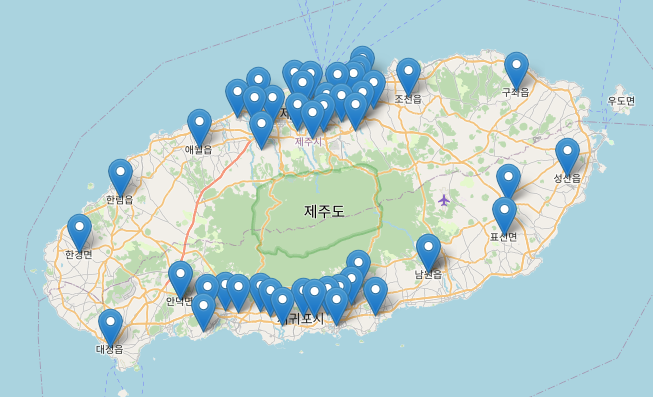